### Deliverable 3: Attempt 3 for Optimzation

In [1]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder
import pandas as pd
import tensorflow as tf

#  Import and read the charity_data.csv.
import pandas as pd 
application_df = pd.read_csv("charity_data.csv")
application_df.head()

,EIN,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,10520599,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,10531628,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,10547893,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,10553066,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,10556103,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [2]:
# Drop the non-beneficial ID columns, 'EIN' and 'NAME'.
application_df = application_df.drop(columns = ['EIN', 'NAME', 'SPECIAL_CONSIDERATIONS'], axis=1)
application_df.head()

,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,ASK_AMT,IS_SUCCESSFUL
0,T10,Independent,C1000,ProductDev,Association,1,0,5000,1
1,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,108590,1
2,T5,CompanySponsored,C3000,ProductDev,Association,1,0,5000,0
3,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,6692,1
4,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,142590,1


In [3]:
# Determine the number of unique values in each column.
application_df.nunique()

APPLICATION_TYPE      17
AFFILIATION            6
CLASSIFICATION        71
USE_CASE               5
ORGANIZATION           4
STATUS                 2
INCOME_AMT             9
ASK_AMT             8747
IS_SUCCESSFUL          2
dtype: int64

In [4]:
# Look at APPLICATION_TYPE value counts for binning
application_counts = application_df.APPLICATION_TYPE.value_counts()
application_counts

T3     27037
T4      1542
T6      1216
T5      1173
T19     1065
T8       737
T7       725
T10      528
T9       156
T13       66
T12       27
T2        16
T25        3
T14        3
T29        2
T15        2
T17        1
Name: APPLICATION_TYPE, dtype: int64

<AxesSubplot:ylabel='Density'>

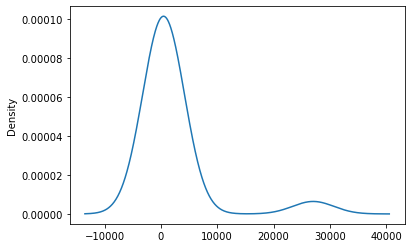

In [5]:
# Visualize the value counts of APPLICATION_TYPE
application_counts.plot.density()

In [6]:
# Determine which values to replace if counts are less than ...?
replace_application = list(application_counts[application_counts < 200].index)

# Replace in dataframe
for app in replace_application:
    application_df.APPLICATION_TYPE = application_df.APPLICATION_TYPE.replace(app,"Other")
    
# Check to make sure binning was successful
application_df.APPLICATION_TYPE.value_counts()

T3       27037
T4        1542
T6        1216
T5        1173
T19       1065
T8         737
T7         725
T10        528
Other      276
Name: APPLICATION_TYPE, dtype: int64

In [7]:
# Look at CLASSIFICATION value counts for binning
classification_counts = application_df.CLASSIFICATION.value_counts()
classification_counts

C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
         ...  
C4120        1
C8210        1
C2561        1
C4500        1
C2150        1
Name: CLASSIFICATION, Length: 71, dtype: int64

<AxesSubplot:ylabel='Density'>

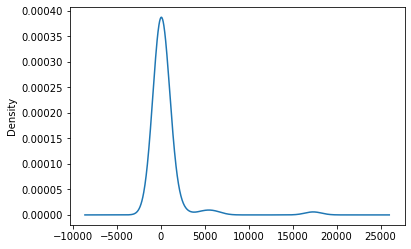

In [8]:
# Visualize the value counts of CLASSIFICATION
classification_counts.plot.density()

In [9]:
# Determine which values to replace if counts are less than ..?
replace_class = list(classification_counts[classification_counts < 1000].index)

# Replace in dataframe
for cls in replace_class:
    application_df.CLASSIFICATION = application_df.CLASSIFICATION.replace(cls,"Other")
    
# Check to make sure binning was successful
application_df.CLASSIFICATION.value_counts()

C1000    17326
C2000     6074
C1200     4837
Other     2261
C3000     1918
C2100     1883
Name: CLASSIFICATION, dtype: int64

In [10]:
# Generate our categorical variable lists
application_df.dtypes
application_cat = ["APPLICATION_TYPE",
                    "AFFILIATION",            
                    "CLASSIFICATION",         
                    "USE_CASE",             
                    "ORGANIZATION",                               
                    "INCOME_AMT"]

In [11]:
# Create a OneHotEncoder instance
enc = OneHotEncoder(sparse=False)

# Fit and transform the OneHotEncoder using the categorical variable list
encode_df = pd.DataFrame(enc.fit_transform(application_df[application_cat]))

# Add the encoded variable names to the dataframe
encode_df.columns = enc.get_feature_names_out(application_cat)
encode_df.head()

,APPLICATION_TYPE_Other,APPLICATION_TYPE_T10,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,APPLICATION_TYPE_T7,APPLICATION_TYPE_T8,AFFILIATION_CompanySponsored,...,ORGANIZATION_Trust,INCOME_AMT_0,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [12]:
# Merge one-hot encoded features and drop the originals
application_df = application_df.merge(encode_df, left_index=True, right_index=True).drop(columns=application_cat, axis=1)
application_df.head()

,STATUS,ASK_AMT,IS_SUCCESSFUL,APPLICATION_TYPE_Other,APPLICATION_TYPE_T10,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,...,ORGANIZATION_Trust,INCOME_AMT_0,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M
0,1,5000,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,108590,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1,5000,0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1,6692,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1,142590,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [13]:
# Split our preprocessed data into our features and target arrays
y = application_df.IS_SUCCESSFUL
X = application_df.drop("IS_SUCCESSFUL", axis=1)

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, stratify=y)

In [14]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

### Compile, Train and Evaluate the Model

In [15]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
number_input_features = len(X_train_scaled[0])
hidden_nodes_layer1 =  100
hidden_nodes_layer2 = 100
hidden_nodes_layer3 = 10

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer1, activation="relu", input_dim=number_input_features))

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))

# Thrid hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer3, activation="relu"))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 100)               4200      
                                                                 
 dense_1 (Dense)             (None, 100)               10100     
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                                 
 dense_3 (Dense)             (None, 1)                 11        
                                                                 
Total params: 15,321
Trainable params: 15,321
Non-trainable params: 0
_________________________________________________________________


In [16]:
# Import checkpoint dependencies
import os
from tensorflow.keras.callbacks import ModelCheckpoint

# Define the checkpoint path and filenames
os.makedirs("checkpoints_optimzation/",exist_ok=True)
checkpoint_path = "checkpoints_optimzation/weights.{epoch:02d}.hdf5"

In [17]:
# Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [18]:
# Create a callback that saves the model's weights every epoch
cp_callback = ModelCheckpoint(
     filepath=checkpoint_path,
     verbose=1,
     save_weights_only=True,
     save_freq=5)

In [19]:
# Train the model
fit_model = nn.fit(X_train,y_train,epochs=25,callbacks=[cp_callback])

Epoch 1/25
  1/804 [..............................] - ETA: 6:56 - loss: 2830.1682 - accuracy: 0.4688
Epoch 1: saving model to checkpoints_optimzation\weights.01.hdf5

Epoch 1: saving model to checkpoints_optimzation\weights.01.hdf5
 10/804 [..............................] - ETA: 6s - loss: 9061.6084 - accuracy: 0.4969  
Epoch 1: saving model to checkpoints_optimzation\weights.01.hdf5
 16/804 [..............................] - ETA: 6s - loss: 9815.8174 - accuracy: 0.5078
Epoch 1: saving model to checkpoints_optimzation\weights.01.hdf5
 21/804 [..............................] - ETA: 6s - loss: 9920.0479 - accuracy: 0.5060
Epoch 1: saving model to checkpoints_optimzation\weights.01.hdf5

Epoch 1: saving model to checkpoints_optimzation\weights.01.hdf5
 30/804 [>.............................] - ETA: 6s - loss: 29398.5117 - accuracy: 0.4948
Epoch 1: saving model to checkpoints_optimzation\weights.01.hdf5
 38/804 [>.............................] - ETA: 6s - loss: 24956.4004 - accuracy: 0.481


Epoch 1: saving model to checkpoints_optimzation\weights.01.hdf5
345/804 [===========>..................] - ETA: 3s - loss: 84426.4609 - accuracy: 0.5030
Epoch 1: saving model to checkpoints_optimzation\weights.01.hdf5

Epoch 1: saving model to checkpoints_optimzation\weights.01.hdf5
355/804 [============>.................] - ETA: 3s - loss: 82386.1328 - accuracy: 0.5051
Epoch 1: saving model to checkpoints_optimzation\weights.01.hdf5

Epoch 1: saving model to checkpoints_optimzation\weights.01.hdf5
365/804 [============>.................] - ETA: 3s - loss: 82673.2188 - accuracy: 0.5051
Epoch 1: saving model to checkpoints_optimzation\weights.01.hdf5

Epoch 1: saving model to checkpoints_optimzation\weights.01.hdf5
375/804 [============>.................] - ETA: 3s - loss: 80830.1250 - accuracy: 0.5060
Epoch 1: saving model to checkpoints_optimzation\weights.01.hdf5

Epoch 1: saving model to checkpoints_optimzation\weights.01.hdf5
385/804 [=============>................] - ETA: 3s - l

705/804 [=========================>....] - ETA: 0s - loss: 57883.8516 - accuracy: 0.5002
Epoch 1: saving model to checkpoints_optimzation\weights.01.hdf5

Epoch 1: saving model to checkpoints_optimzation\weights.01.hdf5
715/804 [=========================>....] - ETA: 0s - loss: 57465.6602 - accuracy: 0.5007
Epoch 1: saving model to checkpoints_optimzation\weights.01.hdf5

Epoch 1: saving model to checkpoints_optimzation\weights.01.hdf5
725/804 [==========================>...] - ETA: 0s - loss: 56881.8594 - accuracy: 0.5010
Epoch 1: saving model to checkpoints_optimzation\weights.01.hdf5

Epoch 1: saving model to checkpoints_optimzation\weights.01.hdf5
735/804 [==========================>...] - ETA: 0s - loss: 56165.8086 - accuracy: 0.5015
Epoch 1: saving model to checkpoints_optimzation\weights.01.hdf5

Epoch 1: saving model to checkpoints_optimzation\weights.01.hdf5
745/804 [==========================>...] - ETA: 0s - loss: 55470.9258 - accuracy: 0.5014
Epoch 1: saving model to checkp

265/804 [========>.....................] - ETA: 3s - loss: 53059.5430 - accuracy: 0.5119
Epoch 2: saving model to checkpoints_optimzation\weights.02.hdf5

Epoch 2: saving model to checkpoints_optimzation\weights.02.hdf5
271/804 [=========>....................] - ETA: 3s - loss: 51919.7656 - accuracy: 0.5108
Epoch 2: saving model to checkpoints_optimzation\weights.02.hdf5

Epoch 2: saving model to checkpoints_optimzation\weights.02.hdf5
281/804 [=========>....................] - ETA: 3s - loss: 50702.1797 - accuracy: 0.5097
Epoch 2: saving model to checkpoints_optimzation\weights.02.hdf5

Epoch 2: saving model to checkpoints_optimzation\weights.02.hdf5
291/804 [=========>....................] - ETA: 3s - loss: 49350.1875 - accuracy: 0.5079
Epoch 2: saving model to checkpoints_optimzation\weights.02.hdf5
299/804 [==========>...................] - ETA: 3s - loss: 48074.8594 - accuracy: 0.5071
Epoch 2: saving model to checkpoints_optimzation\weights.02.hdf5

Epoch 2: saving model to checkp

596/804 [=====================>........] - ETA: 1s - loss: 38038.8438 - accuracy: 0.4981
Epoch 2: saving model to checkpoints_optimzation\weights.02.hdf5

Epoch 2: saving model to checkpoints_optimzation\weights.02.hdf5
606/804 [=====================>........] - ETA: 1s - loss: 37411.2891 - accuracy: 0.4997
Epoch 2: saving model to checkpoints_optimzation\weights.02.hdf5

Epoch 2: saving model to checkpoints_optimzation\weights.02.hdf5
616/804 [=====================>........] - ETA: 1s - loss: 36810.0078 - accuracy: 0.4998
Epoch 2: saving model to checkpoints_optimzation\weights.02.hdf5
624/804 [======================>.......] - ETA: 1s - loss: 36347.9727 - accuracy: 0.4997
Epoch 2: saving model to checkpoints_optimzation\weights.02.hdf5

Epoch 2: saving model to checkpoints_optimzation\weights.02.hdf5
631/804 [======================>.......] - ETA: 1s - loss: 35945.6367 - accuracy: 0.4996
Epoch 2: saving model to checkpoints_optimzation\weights.02.hdf5
639/804 [======================>

126/804 [===>..........................] - ETA: 5s - loss: 1393.0088 - accuracy: 0.4864
Epoch 3: saving model to checkpoints_optimzation\weights.03.hdf5

Epoch 3: saving model to checkpoints_optimzation\weights.03.hdf5
132/804 [===>..........................] - ETA: 5s - loss: 1347.1299 - accuracy: 0.4879
Epoch 3: saving model to checkpoints_optimzation\weights.03.hdf5

Epoch 3: saving model to checkpoints_optimzation\weights.03.hdf5
142/804 [====>.........................] - ETA: 5s - loss: 1263.0441 - accuracy: 0.4881
Epoch 3: saving model to checkpoints_optimzation\weights.03.hdf5

Epoch 3: saving model to checkpoints_optimzation\weights.03.hdf5
152/804 [====>.........................] - ETA: 5s - loss: 2154.3782 - accuracy: 0.4864
Epoch 3: saving model to checkpoints_optimzation\weights.03.hdf5
160/804 [====>.........................] - ETA: 5s - loss: 2111.6248 - accuracy: 0.4924
Epoch 3: saving model to checkpoints_optimzation\weights.03.hdf5

Epoch 3: saving model to checkpoints

447/804 [===============>..............] - ETA: 3s - loss: 19130.0488 - accuracy: 0.5038
Epoch 3: saving model to checkpoints_optimzation\weights.03.hdf5
454/804 [===============>..............] - ETA: 2s - loss: 18836.5566 - accuracy: 0.5049
Epoch 3: saving model to checkpoints_optimzation\weights.03.hdf5
460/804 [================>.............] - ETA: 2s - loss: 18591.1875 - accuracy: 0.5048
Epoch 3: saving model to checkpoints_optimzation\weights.03.hdf5
463/804 [================>.............] - ETA: 2s - loss: 18470.8047 - accuracy: 0.5049
Epoch 3: saving model to checkpoints_optimzation\weights.03.hdf5
467/804 [================>.............] - ETA: 2s - loss: 18313.8828 - accuracy: 0.5044
Epoch 3: saving model to checkpoints_optimzation\weights.03.hdf5
472/804 [================>.............] - ETA: 2s - loss: 18120.2246 - accuracy: 0.5045
Epoch 3: saving model to checkpoints_optimzation\weights.03.hdf5
477/804 [================>.............] - ETA: 2s - loss: 17931.5938 - accu

732/804 [==========================>...] - ETA: 0s - loss: 11796.2842 - accuracy: 0.5041
Epoch 3: saving model to checkpoints_optimzation\weights.03.hdf5
741/804 [==========================>...] - ETA: 0s - loss: 11654.8418 - accuracy: 0.5044
Epoch 3: saving model to checkpoints_optimzation\weights.03.hdf5

Epoch 3: saving model to checkpoints_optimzation\weights.03.hdf5
747/804 [==========================>...] - ETA: 0s - loss: 11563.1445 - accuracy: 0.5045
Epoch 3: saving model to checkpoints_optimzation\weights.03.hdf5
754/804 [===========================>..] - ETA: 0s - loss: 11457.7842 - accuracy: 0.5049
Epoch 3: saving model to checkpoints_optimzation\weights.03.hdf5

Epoch 3: saving model to checkpoints_optimzation\weights.03.hdf5
762/804 [===========================>..] - ETA: 0s - loss: 11340.2393 - accuracy: 0.5048
Epoch 3: saving model to checkpoints_optimzation\weights.03.hdf5
769/804 [===========================>..] - ETA: 0s - loss: 11264.0938 - accuracy: 0.5050
Epoch 3: 

213/804 [======>.......................] - ETA: 6s - loss: 10504.5459 - accuracy: 0.5075
Epoch 4: saving model to checkpoints_optimzation\weights.04.hdf5
218/804 [=======>......................] - ETA: 6s - loss: 10264.0312 - accuracy: 0.5072
Epoch 4: saving model to checkpoints_optimzation\weights.04.hdf5
223/804 [=======>......................] - ETA: 6s - loss: 10044.2559 - accuracy: 0.5070
Epoch 4: saving model to checkpoints_optimzation\weights.04.hdf5
228/804 [=======>......................] - ETA: 6s - loss: 9824.1240 - accuracy: 0.5067 
Epoch 4: saving model to checkpoints_optimzation\weights.04.hdf5
233/804 [=======>......................] - ETA: 6s - loss: 9616.6260 - accuracy: 0.5058
Epoch 4: saving model to checkpoints_optimzation\weights.04.hdf5
238/804 [=======>......................] - ETA: 6s - loss: 9415.1299 - accuracy: 0.5032
Epoch 4: saving model to checkpoints_optimzation\weights.04.hdf5
243/804 [========>.....................] - ETA: 6s - loss: 9221.8613 - accurac

496/804 [=================>............] - ETA: 3s - loss: 5475.1006 - accuracy: 0.4921
Epoch 4: saving model to checkpoints_optimzation\weights.04.hdf5
502/804 [=================>............] - ETA: 3s - loss: 5411.6558 - accuracy: 0.4914
Epoch 4: saving model to checkpoints_optimzation\weights.04.hdf5

Epoch 4: saving model to checkpoints_optimzation\weights.04.hdf5
508/804 [=================>............] - ETA: 3s - loss: 5352.3936 - accuracy: 0.4912
Epoch 4: saving model to checkpoints_optimzation\weights.04.hdf5
513/804 [==================>...........] - ETA: 3s - loss: 5359.6650 - accuracy: 0.4912
Epoch 4: saving model to checkpoints_optimzation\weights.04.hdf5
522/804 [==================>...........] - ETA: 2s - loss: 5268.0059 - accuracy: 0.4915
Epoch 4: saving model to checkpoints_optimzation\weights.04.hdf5

Epoch 4: saving model to checkpoints_optimzation\weights.04.hdf5
528/804 [==================>...........] - ETA: 2s - loss: 5257.1875 - accuracy: 0.4921
Epoch 4: saving

 16/804 [..............................] - ETA: 6s - loss: 173730.2812 - accuracy: 0.5117
Epoch 5: saving model to checkpoints_optimzation\weights.05.hdf5
 23/804 [..............................] - ETA: 6s - loss: 125647.9766 - accuracy: 0.5095
Epoch 5: saving model to checkpoints_optimzation\weights.05.hdf5

Epoch 5: saving model to checkpoints_optimzation\weights.05.hdf5
 29/804 [>.............................] - ETA: 6s - loss: 104975.4453 - accuracy: 0.5086
Epoch 5: saving model to checkpoints_optimzation\weights.05.hdf5
 38/804 [>.............................] - ETA: 6s - loss: 84838.4219 - accuracy: 0.5189 
Epoch 5: saving model to checkpoints_optimzation\weights.05.hdf5

Epoch 5: saving model to checkpoints_optimzation\weights.05.hdf5
 44/804 [>.............................] - ETA: 6s - loss: 77329.3125 - accuracy: 0.5099
Epoch 5: saving model to checkpoints_optimzation\weights.05.hdf5
 53/804 [>.............................] - ETA: 5s - loss: 77958.4375 - accuracy: 0.5165
Epoch

349/804 [============>.................] - ETA: 3s - loss: 18430.9766 - accuracy: 0.4838
Epoch 5: saving model to checkpoints_optimzation\weights.05.hdf5
356/804 [============>.................] - ETA: 3s - loss: 18134.0586 - accuracy: 0.4827
Epoch 5: saving model to checkpoints_optimzation\weights.05.hdf5

Epoch 5: saving model to checkpoints_optimzation\weights.05.hdf5
364/804 [============>.................] - ETA: 3s - loss: 18095.9082 - accuracy: 0.4839
Epoch 5: saving model to checkpoints_optimzation\weights.05.hdf5
373/804 [============>.................] - ETA: 3s - loss: 17674.0449 - accuracy: 0.4832
Epoch 5: saving model to checkpoints_optimzation\weights.05.hdf5

Epoch 5: saving model to checkpoints_optimzation\weights.05.hdf5
379/804 [=============>................] - ETA: 3s - loss: 17410.4863 - accuracy: 0.4836
Epoch 5: saving model to checkpoints_optimzation\weights.05.hdf5

Epoch 5: saving model to checkpoints_optimzation\weights.05.hdf5
389/804 [=============>.........

691/804 [========================>.....] - ETA: 0s - loss: 11834.6914 - accuracy: 0.4856
Epoch 5: saving model to checkpoints_optimzation\weights.05.hdf5
696/804 [========================>.....] - ETA: 0s - loss: 11757.9443 - accuracy: 0.4851
Epoch 5: saving model to checkpoints_optimzation\weights.05.hdf5
703/804 [=========================>....] - ETA: 0s - loss: 11668.0762 - accuracy: 0.4851
Epoch 5: saving model to checkpoints_optimzation\weights.05.hdf5

Epoch 5: saving model to checkpoints_optimzation\weights.05.hdf5
709/804 [=========================>....] - ETA: 0s - loss: 11601.8164 - accuracy: 0.4845
Epoch 5: saving model to checkpoints_optimzation\weights.05.hdf5
714/804 [=========================>....] - ETA: 0s - loss: 11522.2021 - accuracy: 0.4841
Epoch 5: saving model to checkpoints_optimzation\weights.05.hdf5
719/804 [=========================>....] - ETA: 0s - loss: 11630.2881 - accuracy: 0.4839
Epoch 5: saving model to checkpoints_optimzation\weights.05.hdf5
724/804 [=

194/804 [======>.......................] - ETA: 4s - loss: 14811.8350 - accuracy: 0.4953
Epoch 6: saving model to checkpoints_optimzation\weights.06.hdf5

Epoch 6: saving model to checkpoints_optimzation\weights.06.hdf5
200/804 [======>.......................] - ETA: 4s - loss: 14551.9492 - accuracy: 0.4967
Epoch 6: saving model to checkpoints_optimzation\weights.06.hdf5

Epoch 6: saving model to checkpoints_optimzation\weights.06.hdf5
210/804 [======>.......................] - ETA: 4s - loss: 13888.4014 - accuracy: 0.4970
Epoch 6: saving model to checkpoints_optimzation\weights.06.hdf5

Epoch 6: saving model to checkpoints_optimzation\weights.06.hdf5
220/804 [=======>......................] - ETA: 4s - loss: 13283.6670 - accuracy: 0.4972
Epoch 6: saving model to checkpoints_optimzation\weights.06.hdf5

Epoch 6: saving model to checkpoints_optimzation\weights.06.hdf5
230/804 [=======>......................] - ETA: 4s - loss: 13218.4463 - accuracy: 0.4973
Epoch 6: saving model to checkp

544/804 [===================>..........] - ETA: 2s - loss: 13193.3193 - accuracy: 0.5017
Epoch 6: saving model to checkpoints_optimzation\weights.06.hdf5

Epoch 6: saving model to checkpoints_optimzation\weights.06.hdf5
550/804 [===================>..........] - ETA: 2s - loss: 14535.4600 - accuracy: 0.5024
Epoch 6: saving model to checkpoints_optimzation\weights.06.hdf5
557/804 [===================>..........] - ETA: 1s - loss: 14789.7900 - accuracy: 0.5029
Epoch 6: saving model to checkpoints_optimzation\weights.06.hdf5

Epoch 6: saving model to checkpoints_optimzation\weights.06.hdf5
565/804 [====================>.........] - ETA: 1s - loss: 16981.7949 - accuracy: 0.5030
Epoch 6: saving model to checkpoints_optimzation\weights.06.hdf5

Epoch 6: saving model to checkpoints_optimzation\weights.06.hdf5
575/804 [====================>.........] - ETA: 1s - loss: 16769.1660 - accuracy: 0.5039
Epoch 6: saving model to checkpoints_optimzation\weights.06.hdf5
583/804 [====================>..

 75/804 [=>............................] - ETA: 5s - loss: 1753.6050 - accuracy: 0.4842
Epoch 7: saving model to checkpoints_optimzation\weights.07.hdf5

Epoch 7: saving model to checkpoints_optimzation\weights.07.hdf5
 81/804 [==>...........................] - ETA: 5s - loss: 1633.1620 - accuracy: 0.4888
Epoch 7: saving model to checkpoints_optimzation\weights.07.hdf5
 88/804 [==>...........................] - ETA: 5s - loss: 1512.1309 - accuracy: 0.4872
Epoch 7: saving model to checkpoints_optimzation\weights.07.hdf5

Epoch 7: saving model to checkpoints_optimzation\weights.07.hdf5
 96/804 [==>...........................] - ETA: 5s - loss: 1402.2875 - accuracy: 0.4883
Epoch 7: saving model to checkpoints_optimzation\weights.07.hdf5
103/804 [==>...........................] - ETA: 5s - loss: 1350.5558 - accuracy: 0.4927
Epoch 7: saving model to checkpoints_optimzation\weights.07.hdf5

Epoch 7: saving model to checkpoints_optimzation\weights.07.hdf5
111/804 [===>........................

414/804 [==============>...............] - ETA: 3s - loss: 11725.1338 - accuracy: 0.4975
Epoch 7: saving model to checkpoints_optimzation\weights.07.hdf5

Epoch 7: saving model to checkpoints_optimzation\weights.07.hdf5
421/804 [==============>...............] - ETA: 3s - loss: 11536.0332 - accuracy: 0.4986
Epoch 7: saving model to checkpoints_optimzation\weights.07.hdf5

Epoch 7: saving model to checkpoints_optimzation\weights.07.hdf5
431/804 [===============>..............] - ETA: 2s - loss: 11291.4512 - accuracy: 0.4993
Epoch 7: saving model to checkpoints_optimzation\weights.07.hdf5

Epoch 7: saving model to checkpoints_optimzation\weights.07.hdf5
441/804 [===============>..............] - ETA: 2s - loss: 11532.3936 - accuracy: 0.4999
Epoch 7: saving model to checkpoints_optimzation\weights.07.hdf5
447/804 [===============>..............] - ETA: 2s - loss: 11390.4531 - accuracy: 0.4995
Epoch 7: saving model to checkpoints_optimzation\weights.07.hdf5
453/804 [===============>.......

746/804 [==========================>...] - ETA: 0s - loss: 11486.6162 - accuracy: 0.5031
Epoch 7: saving model to checkpoints_optimzation\weights.07.hdf5
752/804 [===========================>..] - ETA: 0s - loss: 11396.8643 - accuracy: 0.5026
Epoch 7: saving model to checkpoints_optimzation\weights.07.hdf5
758/804 [===========================>..] - ETA: 0s - loss: 11307.2715 - accuracy: 0.5026
Epoch 7: saving model to checkpoints_optimzation\weights.07.hdf5

Epoch 7: saving model to checkpoints_optimzation\weights.07.hdf5
766/804 [===========================>..] - ETA: 0s - loss: 11385.1934 - accuracy: 0.5028
Epoch 7: saving model to checkpoints_optimzation\weights.07.hdf5
774/804 [===========================>..] - ETA: 0s - loss: 11269.1240 - accuracy: 0.5029
Epoch 7: saving model to checkpoints_optimzation\weights.07.hdf5

Epoch 7: saving model to checkpoints_optimzation\weights.07.hdf5
781/804 [============================>.] - ETA: 0s - loss: 11173.5684 - accuracy: 0.5033
Epoch 7: 

262/804 [========>.....................] - ETA: 4s - loss: 6112.7437 - accuracy: 0.5007
Epoch 8: saving model to checkpoints_optimzation\weights.08.hdf5
267/804 [========>.....................] - ETA: 4s - loss: 6004.8003 - accuracy: 0.5013
Epoch 8: saving model to checkpoints_optimzation\weights.08.hdf5
272/804 [=========>....................] - ETA: 4s - loss: 5908.9082 - accuracy: 0.5008
Epoch 8: saving model to checkpoints_optimzation\weights.08.hdf5
277/804 [=========>....................] - ETA: 4s - loss: 5881.8335 - accuracy: 0.5012
Epoch 8: saving model to checkpoints_optimzation\weights.08.hdf5
282/804 [=========>....................] - ETA: 4s - loss: 5804.7656 - accuracy: 0.5012
Epoch 8: saving model to checkpoints_optimzation\weights.08.hdf5
287/804 [=========>....................] - ETA: 4s - loss: 5713.2183 - accuracy: 0.5016
Epoch 8: saving model to checkpoints_optimzation\weights.08.hdf5
292/804 [=========>....................] - ETA: 4s - loss: 5678.2197 - accuracy: 0


Epoch 8: saving model to checkpoints_optimzation\weights.08.hdf5
587/804 [====================>.........] - ETA: 1s - loss: 5040.8921 - accuracy: 0.4919
Epoch 8: saving model to checkpoints_optimzation\weights.08.hdf5
596/804 [=====================>........] - ETA: 1s - loss: 4980.8799 - accuracy: 0.4924
Epoch 8: saving model to checkpoints_optimzation\weights.08.hdf5

Epoch 8: saving model to checkpoints_optimzation\weights.08.hdf5
602/804 [=====================>........] - ETA: 1s - loss: 4940.9014 - accuracy: 0.4925
Epoch 8: saving model to checkpoints_optimzation\weights.08.hdf5

Epoch 8: saving model to checkpoints_optimzation\weights.08.hdf5
612/804 [=====================>........] - ETA: 1s - loss: 4886.8765 - accuracy: 0.4938
Epoch 8: saving model to checkpoints_optimzation\weights.08.hdf5

Epoch 8: saving model to checkpoints_optimzation\weights.08.hdf5
622/804 [======================>.......] - ETA: 1s - loss: 4947.5840 - accuracy: 0.4944
Epoch 8: saving model to checkpoints

117/804 [===>..........................] - ETA: 5s - loss: 10204.7041 - accuracy: 0.4893
Epoch 9: saving model to checkpoints_optimzation\weights.09.hdf5

Epoch 9: saving model to checkpoints_optimzation\weights.09.hdf5
123/804 [===>..........................] - ETA: 5s - loss: 9747.4746 - accuracy: 0.4911 
Epoch 9: saving model to checkpoints_optimzation\weights.09.hdf5
128/804 [===>..........................] - ETA: 5s - loss: 9380.6973 - accuracy: 0.4912
Epoch 9: saving model to checkpoints_optimzation\weights.09.hdf5
133/804 [===>..........................] - ETA: 5s - loss: 9080.1504 - accuracy: 0.4875
Epoch 9: saving model to checkpoints_optimzation\weights.09.hdf5
138/804 [====>.........................] - ETA: 5s - loss: 9592.0029 - accuracy: 0.4869
Epoch 9: saving model to checkpoints_optimzation\weights.09.hdf5
143/804 [====>.........................] - ETA: 5s - loss: 9303.2969 - accuracy: 0.4884
Epoch 9: saving model to checkpoints_optimzation\weights.09.hdf5
148/804 [====>

448/804 [===============>..............] - ETA: 2s - loss: 19339.9980 - accuracy: 0.4861
Epoch 9: saving model to checkpoints_optimzation\weights.09.hdf5
457/804 [================>.............] - ETA: 2s - loss: 18966.4102 - accuracy: 0.4864
Epoch 9: saving model to checkpoints_optimzation\weights.09.hdf5

Epoch 9: saving model to checkpoints_optimzation\weights.09.hdf5
463/804 [================>.............] - ETA: 2s - loss: 18726.1621 - accuracy: 0.4860
Epoch 9: saving model to checkpoints_optimzation\weights.09.hdf5

Epoch 9: saving model to checkpoints_optimzation\weights.09.hdf5
473/804 [================>.............] - ETA: 2s - loss: 18341.7910 - accuracy: 0.4862
Epoch 9: saving model to checkpoints_optimzation\weights.09.hdf5

Epoch 9: saving model to checkpoints_optimzation\weights.09.hdf5
483/804 [=================>............] - ETA: 2s - loss: 17973.7852 - accuracy: 0.4863
Epoch 9: saving model to checkpoints_optimzation\weights.09.hdf5
492/804 [=================>.....

798/804 [============================>.] - ETA: 0s - loss: 12697.1602 - accuracy: 0.4920
Epoch 9: saving model to checkpoints_optimzation\weights.09.hdf5
804/804 [==============================] - 6s 8ms/step - loss: 12606.5234 - accuracy: 0.4917
Epoch 10/25
  1/804 [..............................] - ETA: 3s - loss: 103.7337 - accuracy: 0.2812
Epoch 10: saving model to checkpoints_optimzation\weights.10.hdf5
  5/804 [..............................] - ETA: 10s - loss: 327.9473 - accuracy: 0.3375
Epoch 10: saving model to checkpoints_optimzation\weights.10.hdf5
 11/804 [..............................] - ETA: 8s - loss: 849.7267 - accuracy: 0.3778 
Epoch 10: saving model to checkpoints_optimzation\weights.10.hdf5
 16/804 [..............................] - ETA: 8s - loss: 670.0522 - accuracy: 0.3867
Epoch 10: saving model to checkpoints_optimzation\weights.10.hdf5
 21/804 [..............................] - ETA: 8s - loss: 614.9529 - accuracy: 0.4122
Epoch 10: saving model to checkpoints_op


Epoch 10: saving model to checkpoints_optimzation\weights.10.hdf5
319/804 [==========>...................] - ETA: 4s - loss: 24042.9023 - accuracy: 0.5063
Epoch 10: saving model to checkpoints_optimzation\weights.10.hdf5
327/804 [===========>..................] - ETA: 3s - loss: 23456.8340 - accuracy: 0.5073
Epoch 10: saving model to checkpoints_optimzation\weights.10.hdf5

Epoch 10: saving model to checkpoints_optimzation\weights.10.hdf5
334/804 [===========>..................] - ETA: 3s - loss: 22965.4648 - accuracy: 0.5070
Epoch 10: saving model to checkpoints_optimzation\weights.10.hdf5
343/804 [===========>..................] - ETA: 3s - loss: 22368.5840 - accuracy: 0.5080
Epoch 10: saving model to checkpoints_optimzation\weights.10.hdf5

Epoch 10: saving model to checkpoints_optimzation\weights.10.hdf5
349/804 [============>.................] - ETA: 3s - loss: 21997.6230 - accuracy: 0.5090
Epoch 10: saving model to checkpoints_optimzation\weights.10.hdf5

Epoch 10: saving model 

639/804 [======================>.......] - ETA: 1s - loss: 14354.0420 - accuracy: 0.5041
Epoch 10: saving model to checkpoints_optimzation\weights.10.hdf5
644/804 [=======================>......] - ETA: 1s - loss: 14251.7666 - accuracy: 0.5042
Epoch 10: saving model to checkpoints_optimzation\weights.10.hdf5
649/804 [=======================>......] - ETA: 1s - loss: 14147.0723 - accuracy: 0.5042
Epoch 10: saving model to checkpoints_optimzation\weights.10.hdf5
654/804 [=======================>......] - ETA: 1s - loss: 14054.9004 - accuracy: 0.5046
Epoch 10: saving model to checkpoints_optimzation\weights.10.hdf5
660/804 [=======================>......] - ETA: 1s - loss: 14051.6035 - accuracy: 0.5048
Epoch 10: saving model to checkpoints_optimzation\weights.10.hdf5
667/804 [=======================>......] - ETA: 1s - loss: 13914.0117 - accuracy: 0.5041
Epoch 10: saving model to checkpoints_optimzation\weights.10.hdf5

Epoch 10: saving model to checkpoints_optimzation\weights.10.hdf5
674

163/804 [=====>........................] - ETA: 5s - loss: 3309.6848 - accuracy: 0.5297
Epoch 11: saving model to checkpoints_optimzation\weights.11.hdf5

Epoch 11: saving model to checkpoints_optimzation\weights.11.hdf5
170/804 [=====>........................] - ETA: 5s - loss: 3184.9700 - accuracy: 0.5290
Epoch 11: saving model to checkpoints_optimzation\weights.11.hdf5
179/804 [=====>........................] - ETA: 4s - loss: 3037.7434 - accuracy: 0.5232
Epoch 11: saving model to checkpoints_optimzation\weights.11.hdf5

Epoch 11: saving model to checkpoints_optimzation\weights.11.hdf5
185/804 [=====>........................] - ETA: 4s - loss: 2951.3672 - accuracy: 0.5208
Epoch 11: saving model to checkpoints_optimzation\weights.11.hdf5
193/804 [======>.......................] - ETA: 4s - loss: 2853.2725 - accuracy: 0.5189
Epoch 11: saving model to checkpoints_optimzation\weights.11.hdf5

Epoch 11: saving model to checkpoints_optimzation\weights.11.hdf5
200/804 [======>.............


Epoch 11: saving model to checkpoints_optimzation\weights.11.hdf5
505/804 [=================>............] - ETA: 2s - loss: 13733.6279 - accuracy: 0.5058
Epoch 11: saving model to checkpoints_optimzation\weights.11.hdf5
510/804 [==================>...........] - ETA: 2s - loss: 13640.9717 - accuracy: 0.5056
Epoch 11: saving model to checkpoints_optimzation\weights.11.hdf5
515/804 [==================>...........] - ETA: 2s - loss: 13521.1602 - accuracy: 0.5050
Epoch 11: saving model to checkpoints_optimzation\weights.11.hdf5
520/804 [==================>...........] - ETA: 2s - loss: 13393.9053 - accuracy: 0.5050
Epoch 11: saving model to checkpoints_optimzation\weights.11.hdf5
525/804 [==================>...........] - ETA: 2s - loss: 13276.5479 - accuracy: 0.5046
Epoch 11: saving model to checkpoints_optimzation\weights.11.hdf5
531/804 [==================>...........] - ETA: 2s - loss: 13130.6494 - accuracy: 0.5039
Epoch 11: saving model to checkpoints_optimzation\weights.11.hdf5
535

 26/804 [..............................] - ETA: 6s - loss: 46.4290 - accuracy: 0.5108
Epoch 12: saving model to checkpoints_optimzation\weights.12.hdf5
 35/804 [>.............................] - ETA: 5s - loss: 48.4248 - accuracy: 0.5089
Epoch 12: saving model to checkpoints_optimzation\weights.12.hdf5

Epoch 12: saving model to checkpoints_optimzation\weights.12.hdf5
 41/804 [>.............................] - ETA: 6s - loss: 1417.5389 - accuracy: 0.5183
Epoch 12: saving model to checkpoints_optimzation\weights.12.hdf5
 50/804 [>.............................] - ETA: 5s - loss: 1207.1107 - accuracy: 0.5244
Epoch 12: saving model to checkpoints_optimzation\weights.12.hdf5

Epoch 12: saving model to checkpoints_optimzation\weights.12.hdf5
 56/804 [=>............................] - ETA: 6s - loss: 1191.2057 - accuracy: 0.5223
Epoch 12: saving model to checkpoints_optimzation\weights.12.hdf5
 65/804 [=>............................] - ETA: 5s - loss: 1175.9739 - accuracy: 0.5197
Epoch 12: sa

351/804 [============>.................] - ETA: 3s - loss: 2076.9431 - accuracy: 0.4903
Epoch 12: saving model to checkpoints_optimzation\weights.12.hdf5
356/804 [============>.................] - ETA: 3s - loss: 2129.5884 - accuracy: 0.4900
Epoch 12: saving model to checkpoints_optimzation\weights.12.hdf5
362/804 [============>.................] - ETA: 3s - loss: 2114.3967 - accuracy: 0.4890
Epoch 12: saving model to checkpoints_optimzation\weights.12.hdf5
367/804 [============>.................] - ETA: 3s - loss: 2103.0537 - accuracy: 0.4893
Epoch 12: saving model to checkpoints_optimzation\weights.12.hdf5
373/804 [============>.................] - ETA: 3s - loss: 2080.8257 - accuracy: 0.4891
Epoch 12: saving model to checkpoints_optimzation\weights.12.hdf5
378/804 [=============>................] - ETA: 3s - loss: 2059.4084 - accuracy: 0.4883
Epoch 12: saving model to checkpoints_optimzation\weights.12.hdf5
385/804 [=============>................] - ETA: 3s - loss: 2037.0104 - accur

661/804 [=======================>......] - ETA: 1s - loss: 2392.9392 - accuracy: 0.5031
Epoch 12: saving model to checkpoints_optimzation\weights.12.hdf5
666/804 [=======================>......] - ETA: 1s - loss: 2383.2791 - accuracy: 0.5028
Epoch 12: saving model to checkpoints_optimzation\weights.12.hdf5
674/804 [========================>.....] - ETA: 1s - loss: 2411.0410 - accuracy: 0.5027
Epoch 12: saving model to checkpoints_optimzation\weights.12.hdf5
680/804 [========================>.....] - ETA: 1s - loss: 2391.7139 - accuracy: 0.5025
Epoch 12: saving model to checkpoints_optimzation\weights.12.hdf5

Epoch 12: saving model to checkpoints_optimzation\weights.12.hdf5
686/804 [========================>.....] - ETA: 1s - loss: 2418.4031 - accuracy: 0.5019
Epoch 12: saving model to checkpoints_optimzation\weights.12.hdf5
693/804 [========================>.....] - ETA: 0s - loss: 3668.0681 - accuracy: 0.5018
Epoch 12: saving model to checkpoints_optimzation\weights.12.hdf5

Epoch 12

122/804 [===>..........................] - ETA: 9s - loss: 2933.1787 - accuracy: 0.5028
Epoch 13: saving model to checkpoints_optimzation\weights.13.hdf5
127/804 [===>..........................] - ETA: 9s - loss: 2865.4287 - accuracy: 0.5027
Epoch 13: saving model to checkpoints_optimzation\weights.13.hdf5
132/804 [===>..........................] - ETA: 9s - loss: 2764.2739 - accuracy: 0.5047
Epoch 13: saving model to checkpoints_optimzation\weights.13.hdf5
137/804 [====>.........................] - ETA: 9s - loss: 2714.9771 - accuracy: 0.5071
Epoch 13: saving model to checkpoints_optimzation\weights.13.hdf5
142/804 [====>.........................] - ETA: 9s - loss: 2633.0681 - accuracy: 0.5075
Epoch 13: saving model to checkpoints_optimzation\weights.13.hdf5
149/804 [====>.........................] - ETA: 8s - loss: 2509.5432 - accuracy: 0.5101
Epoch 13: saving model to checkpoints_optimzation\weights.13.hdf5
156/804 [====>.........................] - ETA: 8s - loss: 2398.3176 - accur


Epoch 13: saving model to checkpoints_optimzation\weights.13.hdf5
447/804 [===============>..............] - ETA: 3s - loss: 11090.9053 - accuracy: 0.5151
Epoch 13: saving model to checkpoints_optimzation\weights.13.hdf5
455/804 [===============>..............] - ETA: 3s - loss: 10900.3047 - accuracy: 0.5151
Epoch 13: saving model to checkpoints_optimzation\weights.13.hdf5

Epoch 13: saving model to checkpoints_optimzation\weights.13.hdf5
462/804 [================>.............] - ETA: 3s - loss: 10743.7715 - accuracy: 0.5144
Epoch 13: saving model to checkpoints_optimzation\weights.13.hdf5
470/804 [================>.............] - ETA: 3s - loss: 10613.1875 - accuracy: 0.5148
Epoch 13: saving model to checkpoints_optimzation\weights.13.hdf5

Epoch 13: saving model to checkpoints_optimzation\weights.13.hdf5
477/804 [================>.............] - ETA: 3s - loss: 10458.1904 - accuracy: 0.5153
Epoch 13: saving model to checkpoints_optimzation\weights.13.hdf5
485/804 [===============


Epoch 13: saving model to checkpoints_optimzation\weights.13.hdf5
782/804 [============================>.] - ETA: 0s - loss: 6926.6465 - accuracy: 0.5091
Epoch 13: saving model to checkpoints_optimzation\weights.13.hdf5
791/804 [============================>.] - ETA: 0s - loss: 6859.6616 - accuracy: 0.5083
Epoch 13: saving model to checkpoints_optimzation\weights.13.hdf5

Epoch 13: saving model to checkpoints_optimzation\weights.13.hdf5
797/804 [============================>.] - ETA: 0s - loss: 6930.6978 - accuracy: 0.5080
Epoch 13: saving model to checkpoints_optimzation\weights.13.hdf5
804/804 [==============================] - 8s 9ms/step - loss: 6873.2329 - accuracy: 0.5082
Epoch 14/25
  1/804 [..............................] - ETA: 3s - loss: 48.8563 - accuracy: 0.5625
Epoch 14: saving model to checkpoints_optimzation\weights.14.hdf5

Epoch 14: saving model to checkpoints_optimzation\weights.14.hdf5
  8/804 [..............................] - ETA: 6s - loss: 388.3989 - accuracy: 0


Epoch 14: saving model to checkpoints_optimzation\weights.14.hdf5
313/804 [==========>...................] - ETA: 4s - loss: 814.8568 - accuracy: 0.4968
Epoch 14: saving model to checkpoints_optimzation\weights.14.hdf5
320/804 [==========>...................] - ETA: 3s - loss: 799.9435 - accuracy: 0.4979
Epoch 14: saving model to checkpoints_optimzation\weights.14.hdf5

Epoch 14: saving model to checkpoints_optimzation\weights.14.hdf5
328/804 [===========>..................] - ETA: 3s - loss: 804.9465 - accuracy: 0.4978
Epoch 14: saving model to checkpoints_optimzation\weights.14.hdf5
337/804 [===========>..................] - ETA: 3s - loss: 835.0927 - accuracy: 0.4994
Epoch 14: saving model to checkpoints_optimzation\weights.14.hdf5

Epoch 14: saving model to checkpoints_optimzation\weights.14.hdf5
343/804 [===========>..................] - ETA: 3s - loss: 829.3329 - accuracy: 0.5005
Epoch 14: saving model to checkpoints_optimzation\weights.14.hdf5
350/804 [============>............

598/804 [=====================>........] - ETA: 1s - loss: 709.0559 - accuracy: 0.5030
Epoch 14: saving model to checkpoints_optimzation\weights.14.hdf5
603/804 [=====================>........] - ETA: 1s - loss: 703.7463 - accuracy: 0.5026
Epoch 14: saving model to checkpoints_optimzation\weights.14.hdf5
609/804 [=====================>........] - ETA: 1s - loss: 698.9255 - accuracy: 0.5024
Epoch 14: saving model to checkpoints_optimzation\weights.14.hdf5
614/804 [=====================>........] - ETA: 1s - loss: 694.4429 - accuracy: 0.5018
Epoch 14: saving model to checkpoints_optimzation\weights.14.hdf5
621/804 [======================>.......] - ETA: 1s - loss: 687.1650 - accuracy: 0.5009
Epoch 14: saving model to checkpoints_optimzation\weights.14.hdf5
623/804 [======================>.......] - ETA: 1s - loss: 685.3348 - accuracy: 0.5006
Epoch 14: saving model to checkpoints_optimzation\weights.14.hdf5
628/804 [======================>.......] - ETA: 1s - loss: 680.0009 - accuracy: 0.

 70/804 [=>............................] - ETA: 6s - loss: 2355.1106 - accuracy: 0.5080
Epoch 15: saving model to checkpoints_optimzation\weights.15.hdf5
 77/804 [=>............................] - ETA: 6s - loss: 2195.9175 - accuracy: 0.5065
Epoch 15: saving model to checkpoints_optimzation\weights.15.hdf5
 83/804 [==>...........................] - ETA: 6s - loss: 2053.7498 - accuracy: 0.5079
Epoch 15: saving model to checkpoints_optimzation\weights.15.hdf5
 88/804 [==>...........................] - ETA: 6s - loss: 1941.8679 - accuracy: 0.5117
Epoch 15: saving model to checkpoints_optimzation\weights.15.hdf5
 93/804 [==>...........................] - ETA: 6s - loss: 2385.7061 - accuracy: 0.5084
Epoch 15: saving model to checkpoints_optimzation\weights.15.hdf5

Epoch 15: saving model to checkpoints_optimzation\weights.15.hdf5
 99/804 [==>...........................] - ETA: 6s - loss: 2244.4692 - accuracy: 0.5069
Epoch 15: saving model to checkpoints_optimzation\weights.15.hdf5
104/804 [

344/804 [===========>..................] - ETA: 4s - loss: 3847.5103 - accuracy: 0.4982
Epoch 15: saving model to checkpoints_optimzation\weights.15.hdf5
350/804 [============>.................] - ETA: 4s - loss: 3802.8462 - accuracy: 0.4971
Epoch 15: saving model to checkpoints_optimzation\weights.15.hdf5
357/804 [============>.................] - ETA: 4s - loss: 3730.3054 - accuracy: 0.4963
Epoch 15: saving model to checkpoints_optimzation\weights.15.hdf5

Epoch 15: saving model to checkpoints_optimzation\weights.15.hdf5
364/804 [============>.................] - ETA: 4s - loss: 3692.2710 - accuracy: 0.4958
Epoch 15: saving model to checkpoints_optimzation\weights.15.hdf5
371/804 [============>.................] - ETA: 4s - loss: 3630.5779 - accuracy: 0.4964
Epoch 15: saving model to checkpoints_optimzation\weights.15.hdf5
376/804 [=============>................] - ETA: 4s - loss: 3848.9827 - accuracy: 0.4970
Epoch 15: saving model to checkpoints_optimzation\weights.15.hdf5

Epoch 15

674/804 [========================>.....] - ETA: 1s - loss: 3091.0112 - accuracy: 0.4979
Epoch 15: saving model to checkpoints_optimzation\weights.15.hdf5
680/804 [========================>.....] - ETA: 1s - loss: 3103.3701 - accuracy: 0.4978
Epoch 15: saving model to checkpoints_optimzation\weights.15.hdf5

Epoch 15: saving model to checkpoints_optimzation\weights.15.hdf5
689/804 [========================>.....] - ETA: 1s - loss: 3063.8879 - accuracy: 0.4978
Epoch 15: saving model to checkpoints_optimzation\weights.15.hdf5
698/804 [=========================>....] - ETA: 0s - loss: 3024.7185 - accuracy: 0.4988
Epoch 15: saving model to checkpoints_optimzation\weights.15.hdf5

Epoch 15: saving model to checkpoints_optimzation\weights.15.hdf5
704/804 [=========================>....] - ETA: 0s - loss: 2999.7158 - accuracy: 0.4992
Epoch 15: saving model to checkpoints_optimzation\weights.15.hdf5
710/804 [=========================>....] - ETA: 0s - loss: 2975.2598 - accuracy: 0.4994
Epoch 15

190/804 [======>.......................] - ETA: 5s - loss: 402.9243 - accuracy: 0.5257
Epoch 16: saving model to checkpoints_optimzation\weights.16.hdf5

Epoch 16: saving model to checkpoints_optimzation\weights.16.hdf5
200/804 [======>.......................] - ETA: 5s - loss: 405.7931 - accuracy: 0.5256
Epoch 16: saving model to checkpoints_optimzation\weights.16.hdf5

Epoch 16: saving model to checkpoints_optimzation\weights.16.hdf5
210/804 [======>.......................] - ETA: 5s - loss: 387.1894 - accuracy: 0.5226
Epoch 16: saving model to checkpoints_optimzation\weights.16.hdf5

Epoch 16: saving model to checkpoints_optimzation\weights.16.hdf5
220/804 [=======>......................] - ETA: 5s - loss: 371.8008 - accuracy: 0.5220
Epoch 16: saving model to checkpoints_optimzation\weights.16.hdf5

Epoch 16: saving model to checkpoints_optimzation\weights.16.hdf5
230/804 [=======>......................] - ETA: 4s - loss: 382.7747 - accuracy: 0.5211
Epoch 16: saving model to checkpo


Epoch 16: saving model to checkpoints_optimzation\weights.16.hdf5
550/804 [===================>..........] - ETA: 2s - loss: 226.2368 - accuracy: 0.5188
Epoch 16: saving model to checkpoints_optimzation\weights.16.hdf5

Epoch 16: saving model to checkpoints_optimzation\weights.16.hdf5
560/804 [===================>..........] - ETA: 1s - loss: 222.2095 - accuracy: 0.5194
Epoch 16: saving model to checkpoints_optimzation\weights.16.hdf5

Epoch 16: saving model to checkpoints_optimzation\weights.16.hdf5
570/804 [====================>.........] - ETA: 1s - loss: 218.3233 - accuracy: 0.5203
Epoch 16: saving model to checkpoints_optimzation\weights.16.hdf5
579/804 [====================>.........] - ETA: 1s - loss: 214.9408 - accuracy: 0.5204
Epoch 16: saving model to checkpoints_optimzation\weights.16.hdf5

Epoch 16: saving model to checkpoints_optimzation\weights.16.hdf5
585/804 [====================>.........] - ETA: 1s - loss: 212.7436 - accuracy: 0.5205
Epoch 16: saving model to checkpo

 76/804 [=>............................] - ETA: 6s - loss: 0.6906 - accuracy: 0.5366
Epoch 17: saving model to checkpoints_optimzation\weights.17.hdf5
 82/804 [==>...........................] - ETA: 6s - loss: 0.6911 - accuracy: 0.5335
Epoch 17: saving model to checkpoints_optimzation\weights.17.hdf5
 90/804 [==>...........................] - ETA: 5s - loss: 0.6907 - accuracy: 0.5358
Epoch 17: saving model to checkpoints_optimzation\weights.17.hdf5

Epoch 17: saving model to checkpoints_optimzation\weights.17.hdf5
 96/804 [==>...........................] - ETA: 5s - loss: 0.6906 - accuracy: 0.5365
Epoch 17: saving model to checkpoints_optimzation\weights.17.hdf5
104/804 [==>...........................] - ETA: 5s - loss: 0.6907 - accuracy: 0.5358
Epoch 17: saving model to checkpoints_optimzation\weights.17.hdf5

Epoch 17: saving model to checkpoints_optimzation\weights.17.hdf5
111/804 [===>..........................] - ETA: 5s - loss: 0.6905 - accuracy: 0.5374
Epoch 17: saving model to 

408/804 [==============>...............] - ETA: 3s - loss: 0.6913 - accuracy: 0.5316
Epoch 17: saving model to checkpoints_optimzation\weights.17.hdf5
414/804 [==============>...............] - ETA: 3s - loss: 0.6913 - accuracy: 0.5314
Epoch 17: saving model to checkpoints_optimzation\weights.17.hdf5
418/804 [==============>...............] - ETA: 3s - loss: 0.6913 - accuracy: 0.5315
Epoch 17: saving model to checkpoints_optimzation\weights.17.hdf5
425/804 [==============>...............] - ETA: 3s - loss: 0.6913 - accuracy: 0.5314
Epoch 17: saving model to checkpoints_optimzation\weights.17.hdf5

Epoch 17: saving model to checkpoints_optimzation\weights.17.hdf5
431/804 [===============>..............] - ETA: 3s - loss: 0.6912 - accuracy: 0.5322
Epoch 17: saving model to checkpoints_optimzation\weights.17.hdf5
436/804 [===============>..............] - ETA: 3s - loss: 0.6912 - accuracy: 0.5323
Epoch 17: saving model to checkpoints_optimzation\weights.17.hdf5
441/804 [===============>..

715/804 [=========================>....] - ETA: 0s - loss: 0.6911 - accuracy: 0.5328
Epoch 17: saving model to checkpoints_optimzation\weights.17.hdf5

Epoch 17: saving model to checkpoints_optimzation\weights.17.hdf5
721/804 [=========================>....] - ETA: 0s - loss: 0.6911 - accuracy: 0.5329
Epoch 17: saving model to checkpoints_optimzation\weights.17.hdf5
730/804 [==========================>...] - ETA: 0s - loss: 0.6911 - accuracy: 0.5330
Epoch 17: saving model to checkpoints_optimzation\weights.17.hdf5

Epoch 17: saving model to checkpoints_optimzation\weights.17.hdf5
736/804 [==========================>...] - ETA: 0s - loss: 0.6911 - accuracy: 0.5329
Epoch 17: saving model to checkpoints_optimzation\weights.17.hdf5
744/804 [==========================>...] - ETA: 0s - loss: 0.6911 - accuracy: 0.5328
Epoch 17: saving model to checkpoints_optimzation\weights.17.hdf5

Epoch 17: saving model to checkpoints_optimzation\weights.17.hdf5
751/804 [===========================>..] - E

247/804 [========>.....................] - ETA: 4s - loss: 0.6907 - accuracy: 0.5357
Epoch 18: saving model to checkpoints_optimzation\weights.18.hdf5
253/804 [========>.....................] - ETA: 4s - loss: 0.6909 - accuracy: 0.5345
Epoch 18: saving model to checkpoints_optimzation\weights.18.hdf5

Epoch 18: saving model to checkpoints_optimzation\weights.18.hdf5
262/804 [========>.....................] - ETA: 4s - loss: 0.6909 - accuracy: 0.5346
Epoch 18: saving model to checkpoints_optimzation\weights.18.hdf5

Epoch 18: saving model to checkpoints_optimzation\weights.18.hdf5
272/804 [=========>....................] - ETA: 4s - loss: 0.6909 - accuracy: 0.5344
Epoch 18: saving model to checkpoints_optimzation\weights.18.hdf5
281/804 [=========>....................] - ETA: 4s - loss: 0.6911 - accuracy: 0.5329
Epoch 18: saving model to checkpoints_optimzation\weights.18.hdf5

Epoch 18: saving model to checkpoints_optimzation\weights.18.hdf5
287/804 [=========>....................] - E

587/804 [====================>.........] - ETA: 1s - loss: 0.6914 - accuracy: 0.5309
Epoch 18: saving model to checkpoints_optimzation\weights.18.hdf5

Epoch 18: saving model to checkpoints_optimzation\weights.18.hdf5
597/804 [=====================>........] - ETA: 1s - loss: 0.6913 - accuracy: 0.5320
Epoch 18: saving model to checkpoints_optimzation\weights.18.hdf5

Epoch 18: saving model to checkpoints_optimzation\weights.18.hdf5
607/804 [=====================>........] - ETA: 1s - loss: 0.6912 - accuracy: 0.5322
Epoch 18: saving model to checkpoints_optimzation\weights.18.hdf5

Epoch 18: saving model to checkpoints_optimzation\weights.18.hdf5
617/804 [======================>.......] - ETA: 1s - loss: 0.6913 - accuracy: 0.5321
Epoch 18: saving model to checkpoints_optimzation\weights.18.hdf5
626/804 [======================>.......] - ETA: 1s - loss: 0.6913 - accuracy: 0.5318
Epoch 18: saving model to checkpoints_optimzation\weights.18.hdf5

Epoch 18: saving model to checkpoints_optim

127/804 [===>..........................] - ETA: 5s - loss: 0.6911 - accuracy: 0.5330
Epoch 19: saving model to checkpoints_optimzation\weights.19.hdf5

Epoch 19: saving model to checkpoints_optimzation\weights.19.hdf5
133/804 [===>..........................] - ETA: 5s - loss: 0.6912 - accuracy: 0.5317
Epoch 19: saving model to checkpoints_optimzation\weights.19.hdf5

Epoch 19: saving model to checkpoints_optimzation\weights.19.hdf5
143/804 [====>.........................] - ETA: 5s - loss: 0.6916 - accuracy: 0.5286
Epoch 19: saving model to checkpoints_optimzation\weights.19.hdf5
149/804 [====>.........................] - ETA: 5s - loss: 0.6916 - accuracy: 0.5287
Epoch 19: saving model to checkpoints_optimzation\weights.19.hdf5

Epoch 19: saving model to checkpoints_optimzation\weights.19.hdf5
158/804 [====>.........................] - ETA: 5s - loss: 0.6914 - accuracy: 0.5305
Epoch 19: saving model to checkpoints_optimzation\weights.19.hdf5
166/804 [=====>........................] - E

453/804 [===============>..............] - ETA: 2s - loss: 0.6916 - accuracy: 0.5287
Epoch 19: saving model to checkpoints_optimzation\weights.19.hdf5
459/804 [================>.............] - ETA: 2s - loss: 0.6917 - accuracy: 0.5283
Epoch 19: saving model to checkpoints_optimzation\weights.19.hdf5

Epoch 19: saving model to checkpoints_optimzation\weights.19.hdf5
468/804 [================>.............] - ETA: 2s - loss: 0.6916 - accuracy: 0.5291
Epoch 19: saving model to checkpoints_optimzation\weights.19.hdf5

Epoch 19: saving model to checkpoints_optimzation\weights.19.hdf5
478/804 [================>.............] - ETA: 2s - loss: 0.6915 - accuracy: 0.5297
Epoch 19: saving model to checkpoints_optimzation\weights.19.hdf5
487/804 [=================>............] - ETA: 2s - loss: 0.6916 - accuracy: 0.5294
Epoch 19: saving model to checkpoints_optimzation\weights.19.hdf5

Epoch 19: saving model to checkpoints_optimzation\weights.19.hdf5
493/804 [=================>............] - E

779/804 [============================>.] - ETA: 0s - loss: 0.6911 - accuracy: 0.5325
Epoch 19: saving model to checkpoints_optimzation\weights.19.hdf5
783/804 [============================>.] - ETA: 0s - loss: 0.6912 - accuracy: 0.5321
Epoch 19: saving model to checkpoints_optimzation\weights.19.hdf5
788/804 [============================>.] - ETA: 0s - loss: 0.6911 - accuracy: 0.5324
Epoch 19: saving model to checkpoints_optimzation\weights.19.hdf5
793/804 [============================>.] - ETA: 0s - loss: 0.6911 - accuracy: 0.5326
Epoch 19: saving model to checkpoints_optimzation\weights.19.hdf5
798/804 [============================>.] - ETA: 0s - loss: 0.6912 - accuracy: 0.5320
Epoch 19: saving model to checkpoints_optimzation\weights.19.hdf5
804/804 [==============================] - 7s 9ms/step - loss: 0.6911 - accuracy: 0.5324
Epoch 20/25
  1/804 [..............................] - ETA: 4s - loss: 0.7078 - accuracy: 0.4375
Epoch 20: saving model to checkpoints_optimzation\weights.2

289/804 [=========>....................] - ETA: 4s - loss: 0.6917 - accuracy: 0.5285
Epoch 20: saving model to checkpoints_optimzation\weights.20.hdf5
297/804 [==========>...................] - ETA: 4s - loss: 0.6916 - accuracy: 0.5289
Epoch 20: saving model to checkpoints_optimzation\weights.20.hdf5

Epoch 20: saving model to checkpoints_optimzation\weights.20.hdf5
304/804 [==========>...................] - ETA: 4s - loss: 0.6917 - accuracy: 0.5283
Epoch 20: saving model to checkpoints_optimzation\weights.20.hdf5
312/804 [==========>...................] - ETA: 4s - loss: 0.6917 - accuracy: 0.5282
Epoch 20: saving model to checkpoints_optimzation\weights.20.hdf5

Epoch 20: saving model to checkpoints_optimzation\weights.20.hdf5
319/804 [==========>...................] - ETA: 4s - loss: 0.6918 - accuracy: 0.5278
Epoch 20: saving model to checkpoints_optimzation\weights.20.hdf5

Epoch 20: saving model to checkpoints_optimzation\weights.20.hdf5
329/804 [===========>..................] - E

619/804 [======================>.......] - ETA: 1s - loss: 0.6910 - accuracy: 0.5336
Epoch 20: saving model to checkpoints_optimzation\weights.20.hdf5
625/804 [======================>.......] - ETA: 1s - loss: 0.6910 - accuracy: 0.5335
Epoch 20: saving model to checkpoints_optimzation\weights.20.hdf5
631/804 [======================>.......] - ETA: 1s - loss: 0.6911 - accuracy: 0.5328
Epoch 20: saving model to checkpoints_optimzation\weights.20.hdf5
635/804 [======================>.......] - ETA: 1s - loss: 0.6911 - accuracy: 0.5329
Epoch 20: saving model to checkpoints_optimzation\weights.20.hdf5
639/804 [======================>.......] - ETA: 1s - loss: 0.6911 - accuracy: 0.5329
Epoch 20: saving model to checkpoints_optimzation\weights.20.hdf5
644/804 [=======================>......] - ETA: 1s - loss: 0.6911 - accuracy: 0.5330
Epoch 20: saving model to checkpoints_optimzation\weights.20.hdf5
649/804 [=======================>......] - ETA: 1s - loss: 0.6911 - accuracy: 0.5330
Epoch 20:

128/804 [===>..........................] - ETA: 5s - loss: 0.6924 - accuracy: 0.5232
Epoch 21: saving model to checkpoints_optimzation\weights.21.hdf5

Epoch 21: saving model to checkpoints_optimzation\weights.21.hdf5
135/804 [====>.........................] - ETA: 5s - loss: 0.6924 - accuracy: 0.5227
Epoch 21: saving model to checkpoints_optimzation\weights.21.hdf5
144/804 [====>.........................] - ETA: 5s - loss: 0.6924 - accuracy: 0.5226
Epoch 21: saving model to checkpoints_optimzation\weights.21.hdf5

Epoch 21: saving model to checkpoints_optimzation\weights.21.hdf5
150/804 [====>.........................] - ETA: 5s - loss: 0.6922 - accuracy: 0.5250
Epoch 21: saving model to checkpoints_optimzation\weights.21.hdf5
159/804 [====>.........................] - ETA: 5s - loss: 0.6921 - accuracy: 0.5256
Epoch 21: saving model to checkpoints_optimzation\weights.21.hdf5

Epoch 21: saving model to checkpoints_optimzation\weights.21.hdf5
165/804 [=====>........................] - E

470/804 [================>.............] - ETA: 2s - loss: 0.6913 - accuracy: 0.5325
Epoch 21: saving model to checkpoints_optimzation\weights.21.hdf5
476/804 [================>.............] - ETA: 2s - loss: 0.6913 - accuracy: 0.5325
Epoch 21: saving model to checkpoints_optimzation\weights.21.hdf5
480/804 [================>.............] - ETA: 2s - loss: 0.6912 - accuracy: 0.5329
Epoch 21: saving model to checkpoints_optimzation\weights.21.hdf5
486/804 [=================>............] - ETA: 2s - loss: 0.6912 - accuracy: 0.5329
Epoch 21: saving model to checkpoints_optimzation\weights.21.hdf5
491/804 [=================>............] - ETA: 2s - loss: 0.6911 - accuracy: 0.5335
Epoch 21: saving model to checkpoints_optimzation\weights.21.hdf5

Epoch 21: saving model to checkpoints_optimzation\weights.21.hdf5
500/804 [=================>............] - ETA: 2s - loss: 0.6911 - accuracy: 0.5336
Epoch 21: saving model to checkpoints_optimzation\weights.21.hdf5
508/804 [=================>

804/804 [==============================] - 7s 8ms/step - loss: 0.6913 - accuracy: 0.5324
Epoch 22/25

Epoch 22: saving model to checkpoints_optimzation\weights.22.hdf5
  1/804 [..............................] - ETA: 20s - loss: 0.7057 - accuracy: 0.4375
Epoch 22: saving model to checkpoints_optimzation\weights.22.hdf5
  6/804 [..............................] - ETA: 8s - loss: 0.6930 - accuracy: 0.5208 
Epoch 22: saving model to checkpoints_optimzation\weights.22.hdf5
 13/804 [..............................] - ETA: 6s - loss: 0.6931 - accuracy: 0.5192
Epoch 22: saving model to checkpoints_optimzation\weights.22.hdf5

Epoch 22: saving model to checkpoints_optimzation\weights.22.hdf5
 21/804 [..............................] - ETA: 6s - loss: 0.6933 - accuracy: 0.5179
Epoch 22: saving model to checkpoints_optimzation\weights.22.hdf5

Epoch 22: saving model to checkpoints_optimzation\weights.22.hdf5
 31/804 [>.............................] - ETA: 6s - loss: 0.6924 - accuracy: 0.5242
Epoch 2

301/804 [==========>...................] - ETA: 4s - loss: 0.6912 - accuracy: 0.5323
Epoch 22: saving model to checkpoints_optimzation\weights.22.hdf5
306/804 [==========>...................] - ETA: 4s - loss: 0.6911 - accuracy: 0.5332
Epoch 22: saving model to checkpoints_optimzation\weights.22.hdf5
314/804 [==========>...................] - ETA: 4s - loss: 0.6909 - accuracy: 0.5342
Epoch 22: saving model to checkpoints_optimzation\weights.22.hdf5
319/804 [==========>...................] - ETA: 4s - loss: 0.6913 - accuracy: 0.5321
Epoch 22: saving model to checkpoints_optimzation\weights.22.hdf5

Epoch 22: saving model to checkpoints_optimzation\weights.22.hdf5
326/804 [===========>..................] - ETA: 4s - loss: 0.6913 - accuracy: 0.5321
Epoch 22: saving model to checkpoints_optimzation\weights.22.hdf5
333/804 [===========>..................] - ETA: 4s - loss: 0.6913 - accuracy: 0.5320
Epoch 22: saving model to checkpoints_optimzation\weights.22.hdf5

Epoch 22: saving model to 

641/804 [======================>.......] - ETA: 1s - loss: 0.6908 - accuracy: 0.5355
Epoch 22: saving model to checkpoints_optimzation\weights.22.hdf5
648/804 [=======================>......] - ETA: 1s - loss: 0.6908 - accuracy: 0.5353
Epoch 22: saving model to checkpoints_optimzation\weights.22.hdf5

Epoch 22: saving model to checkpoints_optimzation\weights.22.hdf5
656/804 [=======================>......] - ETA: 1s - loss: 0.6909 - accuracy: 0.5352
Epoch 22: saving model to checkpoints_optimzation\weights.22.hdf5
665/804 [=======================>......] - ETA: 1s - loss: 0.6909 - accuracy: 0.5347
Epoch 22: saving model to checkpoints_optimzation\weights.22.hdf5

Epoch 22: saving model to checkpoints_optimzation\weights.22.hdf5
671/804 [========================>.....] - ETA: 1s - loss: 0.6910 - accuracy: 0.5345
Epoch 22: saving model to checkpoints_optimzation\weights.22.hdf5
679/804 [========================>.....] - ETA: 1s - loss: 0.6911 - accuracy: 0.5339
Epoch 22: saving model to 

167/804 [=====>........................] - ETA: 5s - loss: 0.6909 - accuracy: 0.5339
Epoch 23: saving model to checkpoints_optimzation\weights.23.hdf5
175/804 [=====>........................] - ETA: 5s - loss: 0.6909 - accuracy: 0.5341
Epoch 23: saving model to checkpoints_optimzation\weights.23.hdf5

Epoch 23: saving model to checkpoints_optimzation\weights.23.hdf5
182/804 [=====>........................] - ETA: 5s - loss: 0.6906 - accuracy: 0.5374
Epoch 23: saving model to checkpoints_optimzation\weights.23.hdf5
190/804 [======>.......................] - ETA: 5s - loss: 0.6906 - accuracy: 0.5373
Epoch 23: saving model to checkpoints_optimzation\weights.23.hdf5
196/804 [======>.......................] - ETA: 5s - loss: 0.6905 - accuracy: 0.5381
Epoch 23: saving model to checkpoints_optimzation\weights.23.hdf5

Epoch 23: saving model to checkpoints_optimzation\weights.23.hdf5
202/804 [======>.......................] - ETA: 5s - loss: 0.6905 - accuracy: 0.5381
Epoch 23: saving model to 

508/804 [=================>............] - ETA: 2s - loss: 0.6909 - accuracy: 0.5348
Epoch 23: saving model to checkpoints_optimzation\weights.23.hdf5

Epoch 23: saving model to checkpoints_optimzation\weights.23.hdf5
517/804 [==================>...........] - ETA: 2s - loss: 0.6909 - accuracy: 0.5349
Epoch 23: saving model to checkpoints_optimzation\weights.23.hdf5
526/804 [==================>...........] - ETA: 2s - loss: 0.6909 - accuracy: 0.5346
Epoch 23: saving model to checkpoints_optimzation\weights.23.hdf5

Epoch 23: saving model to checkpoints_optimzation\weights.23.hdf5
532/804 [==================>...........] - ETA: 2s - loss: 0.6910 - accuracy: 0.5341
Epoch 23: saving model to checkpoints_optimzation\weights.23.hdf5
538/804 [===================>..........] - ETA: 2s - loss: 0.6910 - accuracy: 0.5336
Epoch 23: saving model to checkpoints_optimzation\weights.23.hdf5

Epoch 23: saving model to checkpoints_optimzation\weights.23.hdf5
547/804 [===================>..........] - E

 37/804 [>.............................] - ETA: 6s - loss: 0.6898 - accuracy: 0.5431
Epoch 24: saving model to checkpoints_optimzation\weights.24.hdf5
 41/804 [>.............................] - ETA: 6s - loss: 0.6891 - accuracy: 0.5473
Epoch 24: saving model to checkpoints_optimzation\weights.24.hdf5
 44/804 [>.............................] - ETA: 7s - loss: 0.6888 - accuracy: 0.5490
Epoch 24: saving model to checkpoints_optimzation\weights.24.hdf5
 51/804 [>.............................] - ETA: 6s - loss: 0.6879 - accuracy: 0.5539
Epoch 24: saving model to checkpoints_optimzation\weights.24.hdf5

Epoch 24: saving model to checkpoints_optimzation\weights.24.hdf5
 58/804 [=>............................] - ETA: 6s - loss: 0.6877 - accuracy: 0.5550
Epoch 24: saving model to checkpoints_optimzation\weights.24.hdf5
 65/804 [=>............................] - ETA: 6s - loss: 0.6885 - accuracy: 0.5505
Epoch 24: saving model to checkpoints_optimzation\weights.24.hdf5

Epoch 24: saving model to 

364/804 [============>.................] - ETA: 3s - loss: 0.6912 - accuracy: 0.5315
Epoch 24: saving model to checkpoints_optimzation\weights.24.hdf5

Epoch 24: saving model to checkpoints_optimzation\weights.24.hdf5
373/804 [============>.................] - ETA: 3s - loss: 0.6914 - accuracy: 0.5300
Epoch 24: saving model to checkpoints_optimzation\weights.24.hdf5
382/804 [=============>................] - ETA: 3s - loss: 0.6914 - accuracy: 0.5300
Epoch 24: saving model to checkpoints_optimzation\weights.24.hdf5

Epoch 24: saving model to checkpoints_optimzation\weights.24.hdf5
388/804 [=============>................] - ETA: 3s - loss: 0.6915 - accuracy: 0.5299
Epoch 24: saving model to checkpoints_optimzation\weights.24.hdf5
395/804 [=============>................] - ETA: 3s - loss: 0.6913 - accuracy: 0.5311
Epoch 24: saving model to checkpoints_optimzation\weights.24.hdf5
402/804 [==============>...............] - ETA: 3s - loss: 0.6913 - accuracy: 0.5312
Epoch 24: saving model to 

661/804 [=======================>......] - ETA: 1s - loss: 0.6912 - accuracy: 0.5326
Epoch 24: saving model to checkpoints_optimzation\weights.24.hdf5

Epoch 24: saving model to checkpoints_optimzation\weights.24.hdf5
668/804 [=======================>......] - ETA: 1s - loss: 0.6912 - accuracy: 0.5325
Epoch 24: saving model to checkpoints_optimzation\weights.24.hdf5
677/804 [========================>.....] - ETA: 1s - loss: 0.6912 - accuracy: 0.5321
Epoch 24: saving model to checkpoints_optimzation\weights.24.hdf5

Epoch 24: saving model to checkpoints_optimzation\weights.24.hdf5
683/804 [========================>.....] - ETA: 1s - loss: 0.6912 - accuracy: 0.5324
Epoch 24: saving model to checkpoints_optimzation\weights.24.hdf5
688/804 [========================>.....] - ETA: 1s - loss: 0.6912 - accuracy: 0.5326
Epoch 24: saving model to checkpoints_optimzation\weights.24.hdf5
696/804 [========================>.....] - ETA: 0s - loss: 0.6912 - accuracy: 0.5323
Epoch 24: saving model to 


Epoch 25: saving model to checkpoints_optimzation\weights.25.hdf5
184/804 [=====>........................] - ETA: 5s - loss: 0.6908 - accuracy: 0.5350
Epoch 25: saving model to checkpoints_optimzation\weights.25.hdf5
191/804 [======>.......................] - ETA: 5s - loss: 0.6906 - accuracy: 0.5365
Epoch 25: saving model to checkpoints_optimzation\weights.25.hdf5

Epoch 25: saving model to checkpoints_optimzation\weights.25.hdf5
199/804 [======>.......................] - ETA: 5s - loss: 0.6908 - accuracy: 0.5353
Epoch 25: saving model to checkpoints_optimzation\weights.25.hdf5

Epoch 25: saving model to checkpoints_optimzation\weights.25.hdf5
209/804 [======>.......................] - ETA: 5s - loss: 0.6910 - accuracy: 0.5341
Epoch 25: saving model to checkpoints_optimzation\weights.25.hdf5

Epoch 25: saving model to checkpoints_optimzation\weights.25.hdf5
219/804 [=======>......................] - ETA: 4s - loss: 0.6910 - accuracy: 0.5335
Epoch 25: saving model to checkpoints_optim

511/804 [==================>...........] - ETA: 2s - loss: 0.6910 - accuracy: 0.5332
Epoch 25: saving model to checkpoints_optimzation\weights.25.hdf5

Epoch 25: saving model to checkpoints_optimzation\weights.25.hdf5
519/804 [==================>...........] - ETA: 2s - loss: 0.6910 - accuracy: 0.5331
Epoch 25: saving model to checkpoints_optimzation\weights.25.hdf5
528/804 [==================>...........] - ETA: 2s - loss: 0.6910 - accuracy: 0.5331
Epoch 25: saving model to checkpoints_optimzation\weights.25.hdf5

Epoch 25: saving model to checkpoints_optimzation\weights.25.hdf5
534/804 [==================>...........] - ETA: 2s - loss: 0.6910 - accuracy: 0.5334
Epoch 25: saving model to checkpoints_optimzation\weights.25.hdf5

Epoch 25: saving model to checkpoints_optimzation\weights.25.hdf5
544/804 [===================>..........] - ETA: 2s - loss: 0.6910 - accuracy: 0.5334
Epoch 25: saving model to checkpoints_optimzation\weights.25.hdf5
552/804 [===================>..........] - E

In [20]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 1s - loss: 0.7178 - accuracy: 0.5152 - 566ms/epoch - 2ms/step
Loss: 0.7178125381469727, Accuracy: 0.5152186751365662


In [21]:
nn.save("AlphabetSoupCharity_optimzation.h5")